In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.display.max_columns = None

In [2]:
data = pd.read_excel('clean.xlsx')
df = data.copy()

In [42]:
df.head()

,Unnamed: 0,year,Jet Fuel_avi_BTU,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Railways_BTU,Water_BTU,Natural_Gas_BTU,Passenger_Car_EFF,Domestic_EFF,Imported_EFF,Light_Truck_EFF,LDV_SWB_EFF,LDV_LWB_EFF,Passenger_Car_Age,Light_Truck_Age,Light_vehicle_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons,CO_emission_million_shots_tons,NOx_emission_million_shots_tons,particulate,SOx_emission_million_shots_tons,Volatile_compound_million_shots_tons,Overall_emission
0,3,1975,1020.330000,49.5224,8931.556064,2295.138398,1103.921827,126.666330,502.402317,150.844338,604.532631,28.4,27.3,30.1,21.3,21.199052,16.992323,4.951678,6.365255,5.882187,389881.923382,2154.0,1290.801,188.398,26.378,10.664157,28.044000,30.765,1575.050157
1,4,1980,1150.096472,62.5040,8442.341323,2862.349250,1568.168922,122.489519,536.335424,203.049118,658.103014,27.9,27.0,29.2,20.8,21.045126,17.270285,5.750083,7.008927,6.576621,396853.724860,3176.0,1397.368,185.408,27.080,10.664157,25.926000,31.107,1677.553157
2,5,1985,1365.525967,50.6042,8624.481448,4002.009473,1684.638041,100.279579,427.254910,233.408258,522.405342,28.4,27.8,29.6,21.0,20.590441,17.403241,7.050624,6.413527,6.831642,407271.871414,3484.0,1423.027,176.845,25.757,31.403973,23.307000,27.403,1707.742973
3,6,1990,1648.625177,42.4306,8391.081006,4283.509658,1940.564437,107.667192,427.941815,283.670059,684.229192,28.3,27.5,29.7,20.8,20.804310,17.333758,7.760635,7.275321,7.603430,430043.766812,4954.0,1586.738,154.188,25.527,27.753000,23.077000,24.108,1841.391000
4,7,1991,1533.601535,42.5508,7758.585753,4596.958616,2021.842131,103.923233,399.229186,281.090318,623.553285,28.6,27.7,30.3,20.5,21.128875,17.323486,7.910438,7.428430,7.750961,424806.490322,5601.0,1566.980,147.128,25.180,27.345000,22.374851,23.577,1812.584851


In [3]:
# remove columns for other emissions
df = df.drop(['year','CO_emission_million_shots_tons', 'NOx_emission_million_shots_tons',
       'particulate', 'SOx_emission_million_shots_tons',
       'Volatile_compound_million_shots_tons','Overall_emission'], axis=1)

In [ ]:
for i in data.columns:
    plt.bar(x = (data['year']),height=(data[i]))
    plt.title(i)
    plt.show()

## Feature Engineering

We'll first establish a baseline by training the model on the un-augmented dataset. This will help us determine whether our new features are actually useful.

Establishing baselines like this is good practice at the start of the feature engineering process. A baseline score can help us decide whether our new features are worth keeping, or whether we should discard them and possibly try something else.

In [4]:
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              RANSACRegressor, TheilSenRegressor)
from sklearn.linear_model import Lasso

In [5]:
def score_dataset(X, y, model=Lasso()):

    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    # Metric is MAE
    score = cross_val_score(
    model, X, y, cv=3, scoring="neg_mean_absolute_error"
    )
    score = -1 * score.mean()

    return score

In [6]:
X = df.copy()
y = X.pop("CO2_emission_million_metric_tons")

baseline_score = score_dataset(X, y)
print(f"Baseline score: {baseline_score:.5f} MAE")

Baseline score: 101.88784 MAE


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.743e+03, tolerance: 1.070e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+04, tolerance: 1.489e+02
  model = cd_fast.enet_coordinate_descent(


In [7]:
y = df['CO2_emission_million_metric_tons'].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [8]:
print("Correlation with CO2 emission:\n")
corr_scores = X.corrwith(df.CO2_emission_million_metric_tons)
corr_scores = corr_scores.sort_values(ascending=False)
print(corr_scores)

Correlation with CO2 emission:

Combination_Truck_road_BTU                 0.885417
Demand_petroleum_transportation)mil_lit    0.868837
Average_MC/15000_miles(dollars)            0.850377
Passenger_Car_Age                          0.781663
Light_vehicle_Age                          0.758439
LDV_LWB_road_BTU                           0.731526
Light_Truck_Age                            0.724113
LDV_SWB_EFF                                0.705221
Jet Fuel_avi_BTU                           0.688695
Water_BTU                                  0.658856
LDV_SWB_road_BTU                           0.641059
Bus_Road_BTU                               0.492193
Domestic_EFF                               0.483961
Railways_BTU                               0.463330
Light_Truck_EFF                            0.439942
Passenger_Car_EFF                          0.439269
LDV_LWB_EFF                                0.438270
Imported_EFF                               0.325050
Natural_Gas_BTU                 

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

In [47]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores  # show a few features with their MI scores

Passenger_Car_Age                          0.914973
Demand_petroleum_transportation)mil_lit    0.892914
Light_vehicle_Age                          0.800595
Average_MC/15000_miles(dollars)            0.794358
Domestic_EFF                               0.737066
Railways_BTU                               0.733799
Light_Truck_Age                            0.725776
Combination_Truck_road_BTU                 0.699951
Light_Truck_EFF                            0.657059
Passenger_Car_EFF                          0.656288
LDV_SWB_EFF                                0.653389
Jet Fuel_avi_BTU                           0.642897
LDV_LWB_road_BTU                           0.560764
LDV_SWB_road_BTU                           0.512257
Imported_EFF                               0.481911
Natural_Gas_BTU                            0.315795
Gasoline_avi_BTU                           0.310577
Bus_Road_BTU                               0.263024
Water_BTU                                  0.233560
LDV_LWB_EFF 

Insight
- Some common theme among these features:
1. Maintanance cost of vehicle
2. Petroleum demand
3. common mode of transport in logistics industry - light vehicle, truck, aviation,passenger car
4. Vehicle age affect efficiency --> emission

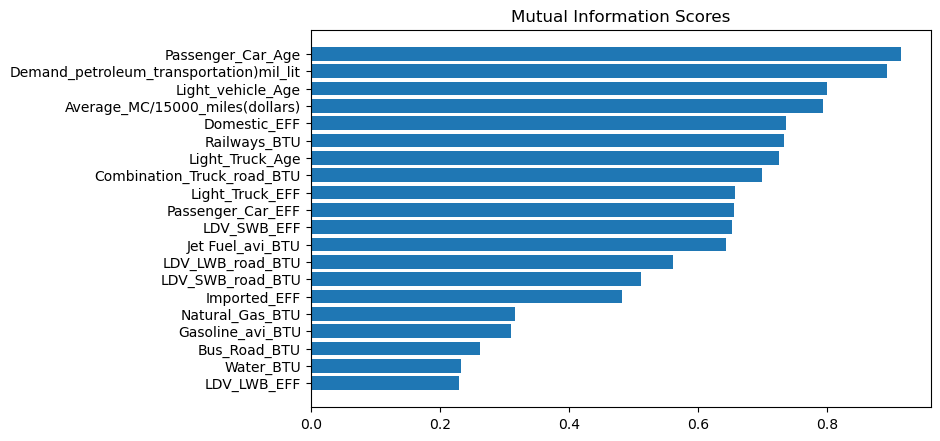

In [48]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
sns.lmplot(x='year', y='CO2_emission_million_metric_tons', data=df)

In [ ]:
sns.lmplot(x='year', y='CO2_emission_million_metric_tons', data=data)

In [ ]:
sns.lmplot(x="year", y="Overall_emission", data=df)

In [ ]:
sns.lmplot(x="LDV_LWB_EFF", y="CO2_emission_million_metric_tons", data=data);

In [ ]:
sns.lmplot(x="Imported_EFF", y="CO2_emission_million_metric_tons", data=data);

In [ ]:
sns.lmplot(x="Natural_Gas_BTU", y="CO2_emission_million_metric_tons", data=data);

In [133]:
score_dataset(X_train, Y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.836e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+03, tolerance: 5.424e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.680e+03, tolerance: 

81.62995594201554

In [9]:
X_train['avg_eff'] = (X_train['Passenger_Car_EFF']+X_train['Domestic_EFF']+X_train['Imported_EFF']
                      +X_train['Light_Truck_EFF'])/4

In [10]:
X_train['avg_age'] = (X_train['Passenger_Car_Age']+X_train['Light_Truck_Age']+
                      X_train['Light_vehicle_Age'])/3

In [11]:
X_train['ratio_eff_age'] =X_train['avg_age']/X_train['avg_eff']

In [184]:
X = X.drop(['LDV_LWB_EFF'],axis = 1)

In [185]:
score_dataset(X_train, Y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.864e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+03, tolerance: 5.424e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.726e+03, tolerance: 

82.87686776802526

In [ ]:
# Create new features from PCA

In [100]:
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

We've selected 3 features that cover a range of properties. Each of these features also has a high MI score with the target. We'll standardize the data since these features aren't naturally on the same scale.

In [ ]:
df.columns

In [101]:
features = ['Demand_petroleum_transportation)mil_lit',
       'Average_MC/15000_miles(dollars)','ratio_eff_age']

#X = df.copy()
#y = X.pop('CO2_emission_million_metric_tons')
X2 = X_train.loc[:, features]

# Standardize
#X_scaled = (X2 - X.mean(axis=0)) / X2.std(axis=0)
X_scaled = np.log(X2)

In [102]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3
0,-0.273357,-0.035892,-0.037579
1,-0.118814,-0.035277,-0.079023
2,-0.345147,-0.065817,-0.029348
3,0.002029,-0.010733,-0.069433
4,-0.412398,-0.006476,0.092305


In [103]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X2.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
Demand_petroleum_transportation)mil_lit,-0.312115,-0.765454,0.562729
Average_MC/15000_miles(dollars),-0.892179,0.439716,0.103282
ratio_eff_age,-0.326499,-0.469819,-0.820164


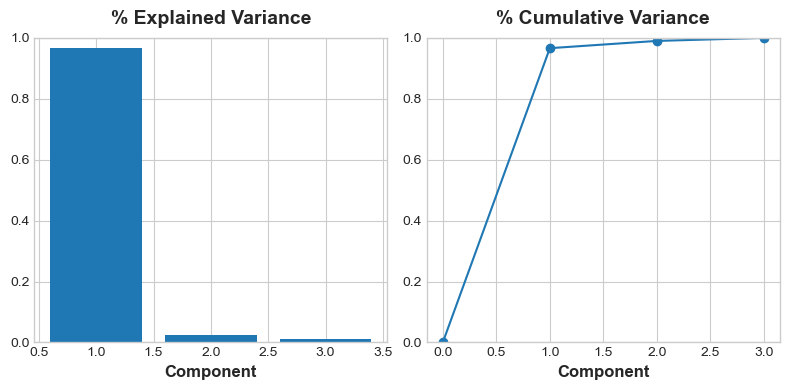

In [104]:
# Look at explained variance
plot_variance(pca);

In [106]:
mi_scores = make_mi_scores(X_pca, Y_train, discrete_features=False)
mi_scores

PC1    0.679375
PC3    0.268405
PC2    0.061861
Name: MI Scores, dtype: float64

In [12]:
X_train["cost_to_petrol"] = X_train['Average_MC/15000_miles(dollars)'] /X_train['Demand_petroleum_transportation)mil_lit']

## Overall feature

In [13]:
X_train = X_train[['Jet Fuel_avi_BTU', 'Gasoline_avi_BTU', 'LDV_LWB_road_BTU',
        'Combination_Truck_road_BTU', 'Bus_Road_BTU',
       'Railways_BTU', 'LDV_SWB_EFF',
       'Demand_petroleum_transportation)mil_lit',
       'Average_MC/15000_miles(dollars)', 'avg_eff', 'avg_age',
       'ratio_eff_age', 'cost_to_petrol']]


## Feature Selection

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [143]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=14, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   25.8s finished

[2022-10-15 18:11:18] Features: 1/14 -- score: 0.8590971089881682[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   24.5s finished

[2022-10-15 18:11:42] Features: 2/14 -- score: 0.8986134467893673[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   23.6s finished

[2022-10-15 18:12:06] Features: 3/14 -- score: 0.9133676773567485[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [144]:
sfs1.k_feature_idx_

(0, 1, 4, 6, 7, 10, 11, 13, 15, 16, 17, 18, 19, 21)

In [145]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['Jet Fuel_avi_BTU', 'Gasoline_avi_BTU', 'Combination_Truck_road_BTU',
       'Railways_BTU', 'Water_BTU', 'Domestic_EFF', 'Imported_EFF',
       'LDV_SWB_EFF', 'Passenger_Car_Age', 'Light_Truck_Age',
       'Light_vehicle_Age', 'Demand_petroleum_transportation)mil_lit',
       'Average_MC/15000_miles(dollars)', 'avg_age'],
      dtype='object')

In [146]:
## Backward elimination
# step backward feature elimination

sfs2 = SFS(RandomForestRegressor(), 
           k_features=14, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs2 = sfs2.fit(np.array(X_train), Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   26.2s finished

[2022-10-15 18:16:40] Features: 23/14 -- score: 0.886208405891937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   25.0s finished

[2022-10-15 18:17:05] Features: 22/14 -- score: 0.890740912814461[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   23.9s finished

[2022-10-15 18:17:29] Features: 21/14 -- score: 0.8835759623814919[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [147]:
sfs2.k_feature_idx_

(0, 1, 3, 4, 5, 6, 10, 11, 12, 13, 17, 18, 20, 21)

In [148]:
X_train.columns[list(sfs2.k_feature_idx_)]


Index(['Jet Fuel_avi_BTU', 'Gasoline_avi_BTU', 'LDV_LWB_road_BTU',
       'Combination_Truck_road_BTU', 'Bus_Road_BTU', 'Railways_BTU',
       'Domestic_EFF', 'Imported_EFF', 'Light_Truck_EFF', 'LDV_SWB_EFF',
       'Light_vehicle_Age', 'Demand_petroleum_transportation)mil_lit',
       'avg_eff', 'avg_age'],
      dtype='object')

In [150]:
score_dataset(X_train, Y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.009e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 5.424e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.449e+03, tolerance: 

67.98696894739136

In [ ]:
# Manual feature selection from EDA

In [14]:
X_test['avg_eff'] = (X_test['Passenger_Car_EFF']+X_test['Domestic_EFF']+X_test['Imported_EFF']+X_test['Light_Truck_EFF'])/4

In [15]:
X_test['avg_age'] = (X_test['Passenger_Car_Age']+ X_test['Light_Truck_Age']+X_test['Light_vehicle_Age'])/3

In [16]:
X_test['ratio_eff_age'] = X_test['avg_age']/X_test['avg_eff']
X_test = X_test.drop(['LDV_LWB_EFF'],axis = 1)

In [17]:
X_test["cost_to_petrol"] = X_test['Average_MC/15000_miles(dollars)'] / X_test['Demand_petroleum_transportation)mil_lit']

## Model Building

### Baseline Validation

In [19]:
# Linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)

score = cross_val_score(lm,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

129.60620688077242

In [20]:
# lasso regression 
lm_l = Lasso()
lm_l.fit(X_train,Y_train)
score = cross_val_score(lm_l,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+04, tolerance: 1.432e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.699e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.590e+03, tolerance: 

60.95749580408036

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.788e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.406e+03, tolerance: 5.424e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.384e+03, tolerance: 

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.405e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.480e+03, tolerance: 5.424e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.157e+03, tolerance: 

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+04, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.706e+03, tolerance: 1.182e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+04, tolerance: 

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+03, tolerance: 1.182e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.855e+03, tolerance: 1.182e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.294e+03, tolerance: 

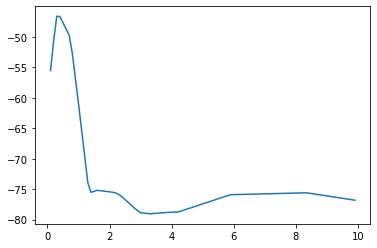

In [21]:
# find optimum alpha that give lowest error
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [22]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
2,0.3,-46.63326


In [23]:
# lasso regression 
lm_l_tuned = Lasso(alpha = 0.3)
lm_l_tuned.fit(X_train,Y_train)
score = cross_val_score(lm_l_tuned,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+04, tolerance: 1.432e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.488e+03, tolerance: 1.101e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.079e+03, tolerance: 

46.633259875152646

In [39]:
# Huber Regressor
# After fine-tune
huber = HuberRegressor().fit(X_train,Y_train)
score = cross_val_score(huber,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

76.01913877146326

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

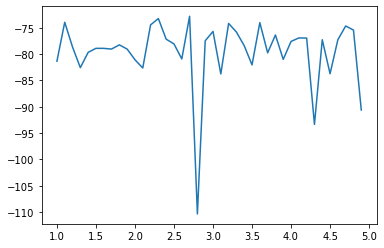

In [25]:
# find optimum alpha that give lowest error
epsilon = []
error = []

for i in range(10,50):
    epsilon.append(i/10)
    huber = HuberRegressor(epsilon=(i/10))
    error.append(np.mean(cross_val_score(huber,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(epsilon,error)

In [26]:
err = tuple(zip(epsilon,error))
df_err = pd.DataFrame(err, columns = ['epsilon','error'])
df_err[df_err.error == max(df_err.error)]

,epsilon,error
17,2.7,-72.827455


In [41]:
# Huber Regressor
# After fine-tune
huber_tuned = HuberRegressor(epsilon=2.7).fit(X_train,Y_train)
score = cross_val_score(huber_tuned,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

72.82745473424478

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

score = cross_val_score(rf,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

56.623698451945806

In [30]:
from sklearn.model_selection import GridSearchCV
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [31]:
param_grid = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('auto','sqrt','log2')}
clf_rf = GridSearchCV(rf, param_grid = param_grid, scoring='neg_mean_absolute_error',cv=3)
best_clf_rf = clf_rf.fit(X_train,Y_train)
clf_performance(best_clf_rf,'RF')

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

RF
Best Score: -49.5110519750066
Best Parameters: {'criterion': 'absolute_error', 'max_features': 'auto', 'n_estimators': 90}


In [32]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train,Y_train)
score = cross_val_score(xgb,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

C:\Users\Acer\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Ind

59.053972521118446

In [33]:
tsmodel = TheilSenRegressor()
tsmodel.fit(X_train, Y_train)
score = cross_val_score(tsmodel,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

140.8677169177739

In [34]:
rmodel = RANSACRegressor()
rmodel.fit(X_train, Y_train)
score = cross_val_score(rmodel,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

150.86984397824676

In [35]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, Y_train)
score = cross_val_score(br,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

79.09877986596796

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor().fit(X_train, Y_train)
score = cross_val_score(gbm_model,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)
score = -1 * score.mean()
score

58.24676051620143

In [37]:
param_grid = {'learning_rate':[0.1, 0.5, 1, 1.5], 'max_depth':[1,3,5,7], 'loss':('squared_error', 'absolute_error', 'huber', 'quantile'),
             'criterion':('friedman_mse', 'squared_error')}

clf_gbm = GridSearchCV(gbm_model, param_grid = param_grid, scoring='neg_mean_absolute_error',cv=3)
best_clf_gbm = clf_gbm.fit(X_train,Y_train)
clf_performance(best_clf_gbm,'Gradient Boosting Regressor')

Gradient Boosting Regressor
Best Score: -53.949082729662074
Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 5}


In [42]:
# train_set
tpred_lm1 = lm.predict(X_train)
tpred_lml1 = lm_l.predict(X_train)
tpred_lml_tuned1 = lm_l_tuned.predict(X_train)
tpred_huber1 = huber.predict(X_train)
tpred_huber_tuned1 = huber_tuned.predict(X_train)
tpred_rf1 = rf.predict(X_train) 
tpred_rf_tuned1 = clf_rf.predict(X_train) 
tpred_gbm1 = gbm_model.predict(X_train)
tpred_xgb1 = xgb.predict(X_train)
tpred_gbm_tuned1 = clf_gbm.predict(X_train)
tpred_ts1 = tsmodel.predict(X_train)
tpred_r1 = rmodel.predict(X_train)
tpred_br1 = br.predict(X_train)

In [43]:
from sklearn.metrics import mean_absolute_error
print('Train MAE Linear:',mean_absolute_error(Y_train,tpred_lm1))
print('Train MAE Lasso:',mean_absolute_error(Y_train,tpred_lml1))
print('Train MAE Lasso_tuned:',mean_absolute_error(Y_train,tpred_lml_tuned1))
print('Train MAE Huber:',mean_absolute_error(Y_train,tpred_huber1))
print('Train MAE Huber_tuned:',mean_absolute_error(Y_train,tpred_huber_tuned1))
print('Train MAE RandomForest:',mean_absolute_error(Y_train,tpred_rf1))
print('Train MAE RandomForest_tuned:',mean_absolute_error(Y_train,tpred_rf_tuned1))
print('Train MAE Gradientboosting:',mean_absolute_error(Y_train,tpred_gbm1))
print('Train MAE xgboost:',mean_absolute_error(Y_train,tpred_xgb1))
print('Train MAE Gradientboosting_tuned:',mean_absolute_error(Y_train,tpred_gbm_tuned1))
print('Train MAE Theilsen:',mean_absolute_error(Y_train,tpred_ts1))
print('Train MAE RANSAC:',mean_absolute_error(Y_train,tpred_r1))
print('Train MAE Bayesian Ridge:',mean_absolute_error(Y_train,tpred_br1))


Train MAE Linear: 18.806169009568066
Train MAE Lasso: 20.75318509111147
Train MAE Lasso_tuned: 20.578697154336176
Train MAE Huber: 65.27752705650562
Train MAE Huber_tuned: 66.19105034061646
Train MAE RandomForest: 17.42892056766968
Train MAE RandomForest_tuned: 16.235574911295018
Train MAE Gradientboosting: 0.05005053064235199
Train MAE xgboost: 0.0004906450023921794
Train MAE Gradientboosting_tuned: 1.774906248940187
Train MAE Theilsen: 35.7095218306156
Train MAE RANSAC: 18.8061690095415
Train MAE Bayesian Ridge: 55.6180093532306


In [44]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_lml_tuned = lm_l_tuned.predict(X_test)
tpred_huber = huber.predict(X_test)
tpred_huber_tuned = huber_tuned.predict(X_test)
tpred_rf = rf.predict(X_test) 
tpred_rf_tuned = clf_rf.predict(X_test) 
tpred_gbm = gbm_model.predict(X_test)
tpred_xgb = xgb.predict(X_test)
tpred_gbm_tuned = clf_gbm.predict(X_test)
tpred_ts = tsmodel.predict(X_test)
tpred_r = rmodel.predict(X_test)
tpred_br = br.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error
print('Test MAE Linear:',mean_absolute_error(Y_test,tpred_lm))
print('Test MAE Lasso:',mean_absolute_error(Y_test,tpred_lml))
print('Test MAE Lasso_tuned:',mean_absolute_error(Y_test,tpred_lml_tuned))
print('Test MAE Huber:',mean_absolute_error(Y_test,tpred_huber))
print('Test MAE Huber_tuned:',mean_absolute_error(Y_test,tpred_huber_tuned))
print('Test MAE RandomForest:',mean_absolute_error(Y_test,tpred_rf))
print('Test MAE RandomForest_tuned:',mean_absolute_error(Y_test,tpred_rf_tuned))
print('Test MAE Gradientboosting:',mean_absolute_error(Y_test,tpred_gbm))
print('Test MAE xgboost:',mean_absolute_error(Y_test,tpred_xgb))
print('Test MAE Gradientboosting_tuned:',mean_absolute_error(Y_test,tpred_gbm_tuned))
print('Test MAE Theilsen:',mean_absolute_error(Y_test,tpred_ts))
print('Test MAE RANSAC:',mean_absolute_error(Y_test,tpred_r))
print('Test MAE Bayesian Ridge:',mean_absolute_error(Y_test,tpred_br))
#print(f"r2 Score Of Lasso Test Set : {r2_score(Y_test, tpred_lml)}")

Test MAE Linear: 60.0118546286559
Test MAE Lasso: 52.524440538825424
Test MAE Lasso_tuned: 54.71466097752651
Test MAE Huber: 22.523382489176225
Test MAE Huber_tuned: 22.95261739897605
Test MAE RandomForest: 34.692593460279134
Test MAE RandomForest_tuned: 33.314893929277275
Test MAE Gradientboosting: 35.04436983545154
Test MAE xgboost: 46.59051953125
Test MAE Gradientboosting_tuned: 29.05569254393515
Test MAE Theilsen: 47.7328432501194
Test MAE RANSAC: 60.01185462865177
Test MAE Bayesian Ridge: 44.17208577838028


In [48]:
from sklearn.metrics import r2_score
print(f"r2 Score Of Lasso Test Set : {r2_score(Y_test, tpred_lml)}")
print(f"r2 Score Of Huber Test Set : {r2_score(Y_test, tpred_huber)}")
print(f"r2 Score Of RANSAC Test Set : {r2_score(Y_test, tpred_r)}")
print(f"r2 Score Of Theilsen Test Set : {r2_score(Y_test, tpred_ts)}")
print(f"r2 Score Of Linear Test Set : {r2_score(Y_test, tpred_lm)}")

r2 Score Of Lasso Test Set : 0.8113249201427873
r2 Score Of Huber Test Set : 0.957035682607646
r2 Score Of RANSAC Test Set : 0.7316777847536597
r2 Score Of Theilsen Test Set : 0.8190402614610142
r2 Score Of Linear Test Set : 0.7316777847536601


In [50]:
# create a dataframe with real predictions and values
df2 = pd.DataFrame({'pred': tpred_huber, 'observed': Y_test})
df2

,pred,observed
0,1909.237043,1886.292
1,1628.486379,1632.051
2,1385.909873,1397.368
3,1759.952614,1747.712
4,1855.691934,1813.662
5,1844.069667,1847.157
6,1551.023323,1586.738
7,1808.982840,1812.879
8,1891.559076,1895.531
9,1909.433595,1831.809


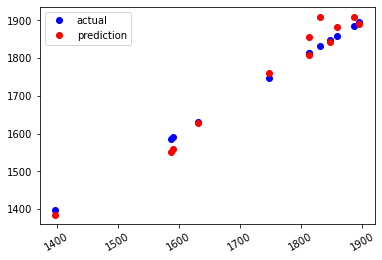

In [53]:
plt.plot(Y_test, df2['observed'], 'bo', label = 'actual')
plt.plot(Y_test, df2['pred'], 'ro', label = 'prediction')
plt.xticks(rotation = '30'); 
plt.legend()

## Feature Importance

In [54]:
import eli5
eli5.show_weights(huber, top=-1, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.399,Railways_BTU
+0.181,Jet Fuel_avi_BTU
+0.082,Combination_Truck_road_BTU
+0.037,Gasoline_avi_BTU
+0.021,LDV_LWB_road_BTU
+0.014,avg_eff
+0.011,LDV_SWB_EFF
+0.002,Demand_petroleum_transportation)mil_lit
+0.001,<BIAS>
+0.000,avg_age


### Permutation Importance

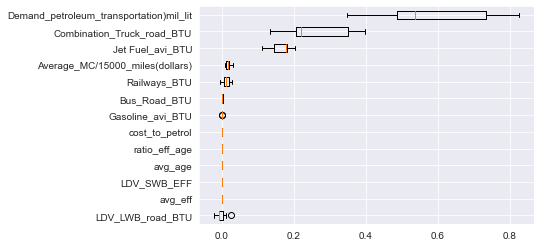

In [69]:
from sklearn.inspection import permutation_importance
result = permutation_importance(huber, X_test, Y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()


plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_test.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

In [68]:
from sklearn.inspection import permutation_importance
r = permutation_importance(huber, X_test, Y_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X_test.columns[i]:<10}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")



Demand_petroleum_transportation)mil_lit0.584 +/- 0.190
Combination_Truck_road_BTU0.241 +/- 0.085
Jet Fuel_avi_BTU0.144 +/- 0.059


## Partial Plot

In [77]:
#first_model = huber.fit(X_test,Y_test)
y = df['CO2_emission_million_metric_tons']
base_features = ['Demand_petroleum_transportation)mil_lit',
                 'Combination_Truck_road_BTU',
                 'Jet Fuel_avi_BTU']
X = df[base_features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = huber.fit(train_X, train_y)

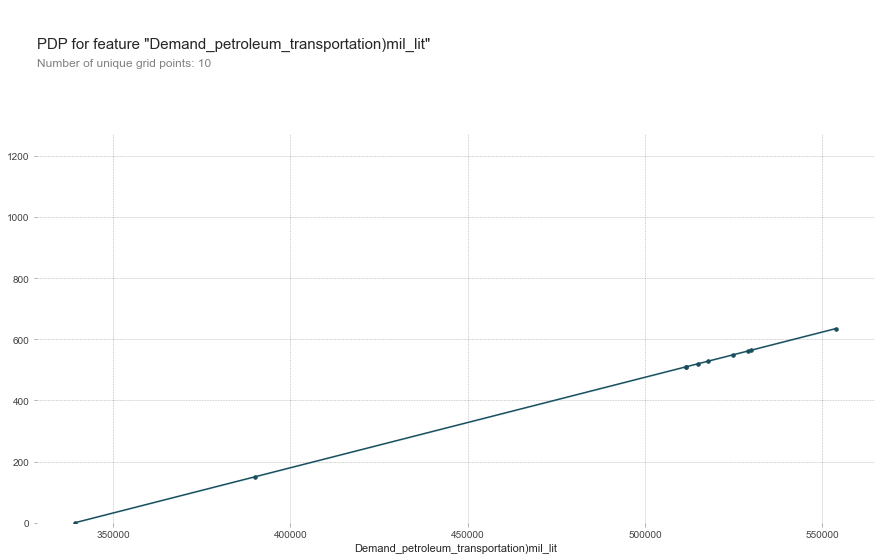

In [79]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'Demand_petroleum_transportation)mil_lit'
pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

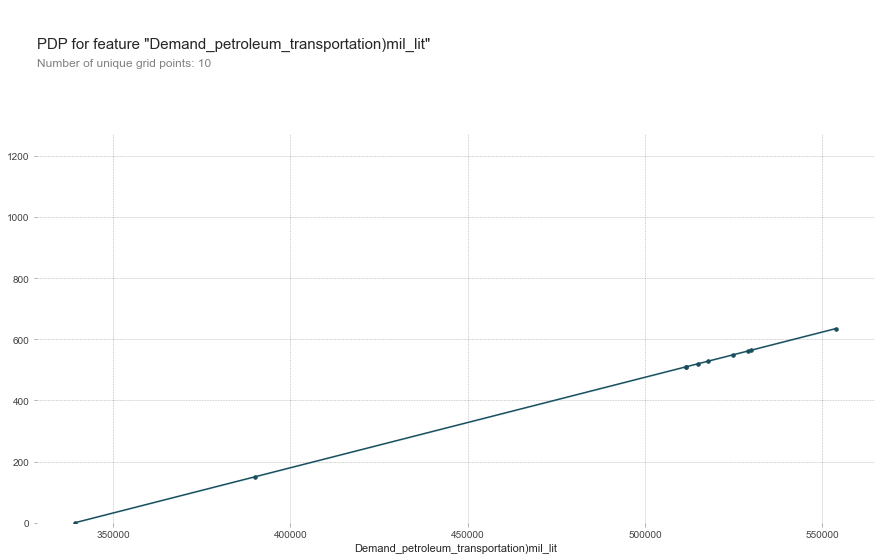

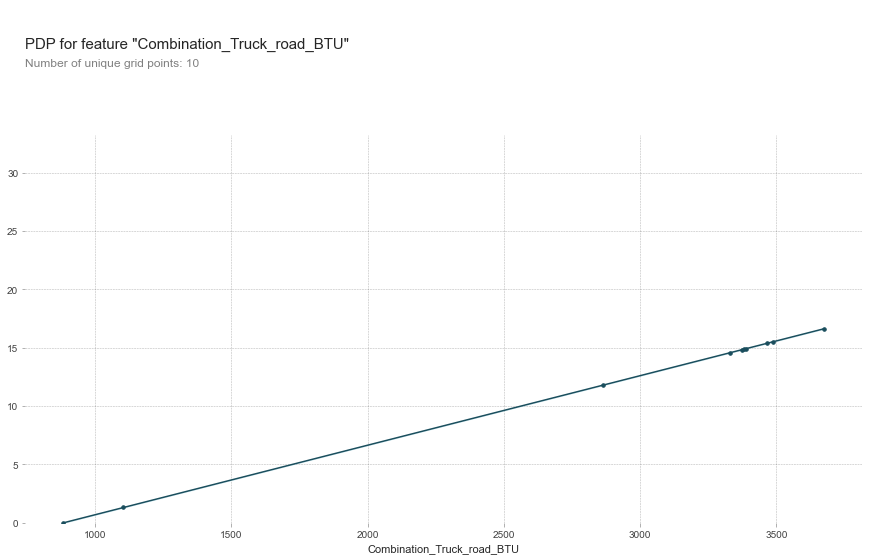

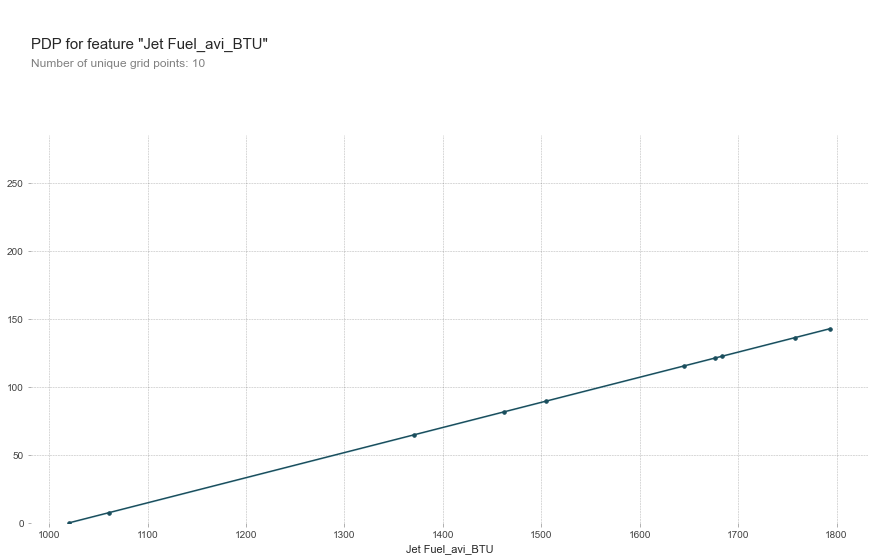

In [80]:
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X,
                               model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

In [142]:
huber

HuberRegressor()

## Save model

In [70]:
model = HuberRegressor()
model.fit(X_train, Y_train)
# Predict
preds_huber = model.predict(X_test)
print('Test MAE huber:',mean_absolute_error(Y_test,preds_huber))

Test MAE huber: 22.523382489176225


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [215]:
# save model 
import pickle
pickl = {'model': model}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [216]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [223]:
df.head()

,Jet Fuel_avi_BTU,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Railways_BTU,Water_BTU,Natural_Gas_BTU,Passenger_Car_EFF,Domestic_EFF,Imported_EFF,Light_Truck_EFF,LDV_SWB_EFF,LDV_LWB_EFF,Passenger_Car_Age,Light_Truck_Age,Light_vehicle_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons
0,263.790000,29.0884,4952.283840,1481.134324,800.864188,99.476522,475.750403,108.118847,359.916775,24.3,22.6,29.6,18.5,15.983485,12.226114,2.736052,3.874443,3.579506,230005.240618,1039.187850,1374.320141
1,525.015000,35.0984,5980.980778,1481.134324,800.864188,105.250250,493.472552,89.572412,519.043388,27.6,26.3,31.5,20.7,17.515866,14.287840,3.545830,4.507242,4.273145,269470.995991,1792.461127,1396.412863
2,1060.695000,66.2302,8164.903979,1481.134324,883.853950,98.660622,487.015645,112.515039,748.886142,28.0,26.9,29.9,20.8,20.324466,16.134621,4.210359,5.580718,5.137797,339177.522046,2061.445626,1153.094322
3,1020.330000,49.5224,8931.556064,2295.138398,1103.921827,126.666330,502.402317,150.844338,604.532631,28.4,27.3,30.1,21.3,21.199052,16.992323,4.951678,6.365255,5.882187,389881.923382,2154.000000,1290.801000
4,1150.096472,62.5040,8442.341323,2862.349250,1568.168922,122.489519,536.335424,203.049118,658.103014,27.9,27.0,29.2,20.8,21.045126,17.270285,5.750083,7.008927,6.576621,396853.724860,3176.000000,1397.368000


In [227]:
# data_in for flask API
list(X_test.iloc[1,:])

[976.4415,
 22.15050358999756,
 4450.35637556659,
 3418.737391346746,
 247.0552967687024,
 406.510379,
 23.81640486113254,
 483422.90998278,
 9561.0,
 43.08960028069606,
 11.937750718825255,
 0.2770448238335901,
 0.0197777138868751]

In [228]:
# test predict first row
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but HuberRegressor was fitted with feature names
  warnings.warn(


array([1628.48637859])